# Simple Bandit
This is a notebook experimenting on the k-Armed Bandit test bed example in the "Reinforcement Learning" text by Barto and Sutton.
This is an example with summaries of experiments with a simple reinforcement learning algorithm

In [8]:
import sys
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.insert(1, os.path.join(os.getcwd(),'src'))
import bandit

## k-Armed Bandit
This is a k-Armed Bandit problem with the reward for each of the k-arms given as follows:
1. Average Reward for each arm is normally distributed with mean 0 and std 1
2. Each reward is stochastic but stationary and normally distributed with the average reward (from above) as the mean and standard deviation 1.
The term stationary means that the distribution of reward does not change or drift with time/#steps taken during simulation

In [11]:
k = 10
R = []
np.random.seed(1)
for i in range(k):
    R += [bandit.Gaussian(0,1)[0]]
print("R = ", np.round(R,3))
# R =  [ 1.791  1.297 -0.863  2.485 -1.639  1.151  1.151  2.707 -0.943  1.665]

R =  [ 1.624 -0.612 -0.528 -1.073  0.865 -2.302  1.745 -0.761  0.319 -0.249]


## Rewards and Actions
In the example below with 10-arms, the average reward for action (or arm) #7 is the best any learning algorithm will achieve if it repeatedly chooses action #7. The distribution of rewards for each action is plotted below.

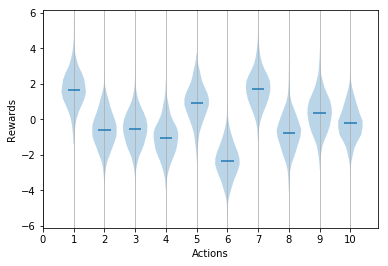

In [12]:
np.random.seed(1)
data = [np.random.normal(R[i],1,1000) for i in range(k)]
plt.violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
plt.grid(axis='x');
plt.xticks(range(k+1));
plt.ylabel('Rewards');
plt.xlabel('Actions');

## Simulation after 1000 steps
A simple simulation of the k-Armed bandit problem wiht a greedy algorithm of selecting the best action at each time step simulated over 1000 steps is shown below.

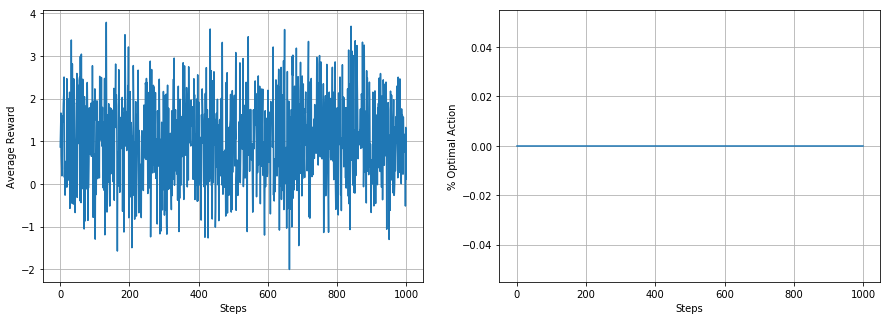

In [4]:
steps = 1000
rewards_1Run,optAct_1Run = bandit.runSimpleBandit(R,steps,1,[0],0,0,0)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(steps),rewards_1Run[0]);
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].plot(range(steps),optAct_1Run[0]);
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');

## Simulation after 2000 runs each with 1000 steps

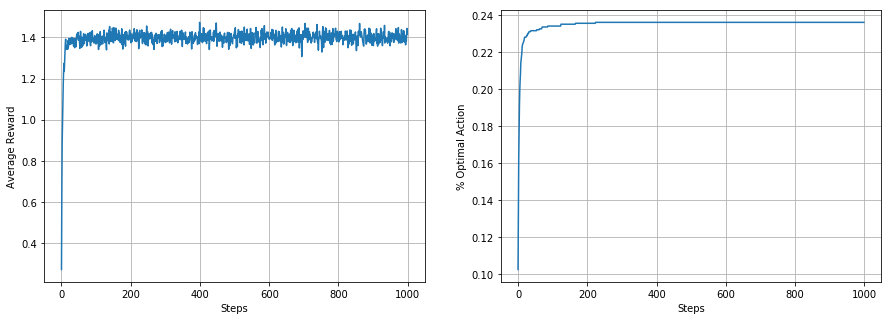

In [5]:
runs = 2000
rewards_2kRun,optAct_2kRun = bandit.runSimpleBandit(R,steps,runs,[0],0,0,0)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(steps),rewards_2kRun[0]);
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].plot(range(steps),optAct_2kRun[0]);
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');

## Exploration vs Exploitation

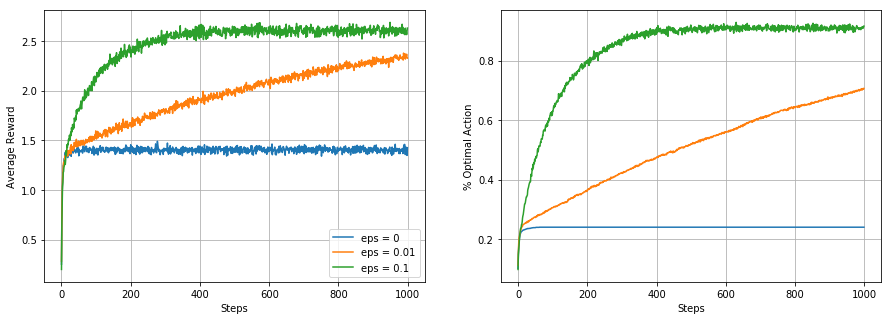

In [6]:
eps = [0,0.01,0.1]
rewards_eps,optAct_eps = bandit.runSimpleBandit(R,steps,runs,eps,0,0,0)
# print(len(rewards),len(optAct))
fig,ax = plt.subplots(1,2,figsize=(15,5))
lgd = []
for i,e in enumerate(eps): 
    ax[0].plot(range(steps),rewards_eps[i]);
    ax[1].plot(range(steps),optAct_eps[i]);
    
ax[0].legend(["eps = " + str(e) for e in eps])
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');

## Constant step size

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1, 1000)

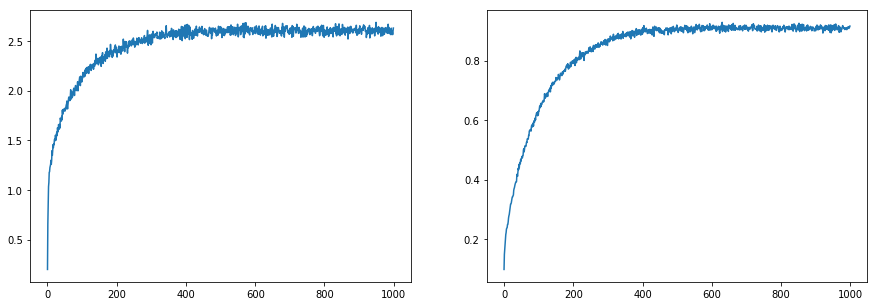

In [7]:
alpha = [0.1,0.5]
r_alpha1,o_alpha1 = bandit.runSimpleBandit(R,steps,runs,[eps[2]],0,alpha[0],0)
r_alpha2,o_alpha2 = bandit.runSimpleBandit(R,steps,runs,[eps[2]],0,alpha[1],0)

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(steps),rewards_eps[2]);
ax[1].plot(range(steps),optAct_eps[2]);

ax[0].plot(range(steps),r_alpha1[0]);
ax[1].plot(range(steps),o_alpha1[0]);

ax[0].plot(range(steps),r_alpha2[0]);
ax[1].plot(range(steps),o_alpha2[0]);

ax[0].legend(["Sampled Average","alpha = 0.1","alpha = 0.5"])
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');

## Non-stationary Task

In [ ]:
steps = 10000
runs = 2000

randomWalkSigma = 0.01
rewards_ns_sampled,optAct_ns_sampled = bandit.runSimpleBandit(R,steps,runs,[eps[2]],0,0,randomWalkSigma)
rewards_ns_alpha1,optAct_ns_alpha1 = bandit.runSimpleBandit(R,steps,runs,[eps[2]],0,alpha[0],randomWalkSigma)

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(steps),rewards_ns_sampled[i]);
ax[1].plot(range(steps),optAct_ns_sampled[i]); 

ax[0].plot(range(steps),rewards_ns_alpha1[i]);
ax[1].plot(range(steps),optAct_ns_alpha1[i]);

ax[0].legend(["Sampled Average","Constant Step Size"])
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');

## Initial Condition

In [ ]:
eps = [0.1]
init = 5

rewards_init,optAct_init = bandit.runSimpleBandit(R,steps,runs,[eps[2]],init,0,0)

fig,ax = plt.subplots(1,2,figsize=(15,5))
lgd = []
ax[0].plot(range(steps),rewards_eps[0]);
ax[1].plot(range(steps),optAct_eps[0]);
lgd += ['Sampled Average']

ax[0].plot(range(steps),rewards_alpha[-1]);
ax[1].plot(range(steps),optAct_alpha[-1]); 
lgd += ['alpha = 0.1']

ax[0].plot(range(steps),rewards_init[0]);
ax[1].plot(range(steps),optAct_init[0]); 
lgd += ["Sampled Average with optimistic Init"]

ax[0].legend(lgd)
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');

## Exponential Recency Weighting without bias